In [1]:
import sklearn
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("data/credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [3]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## EDA

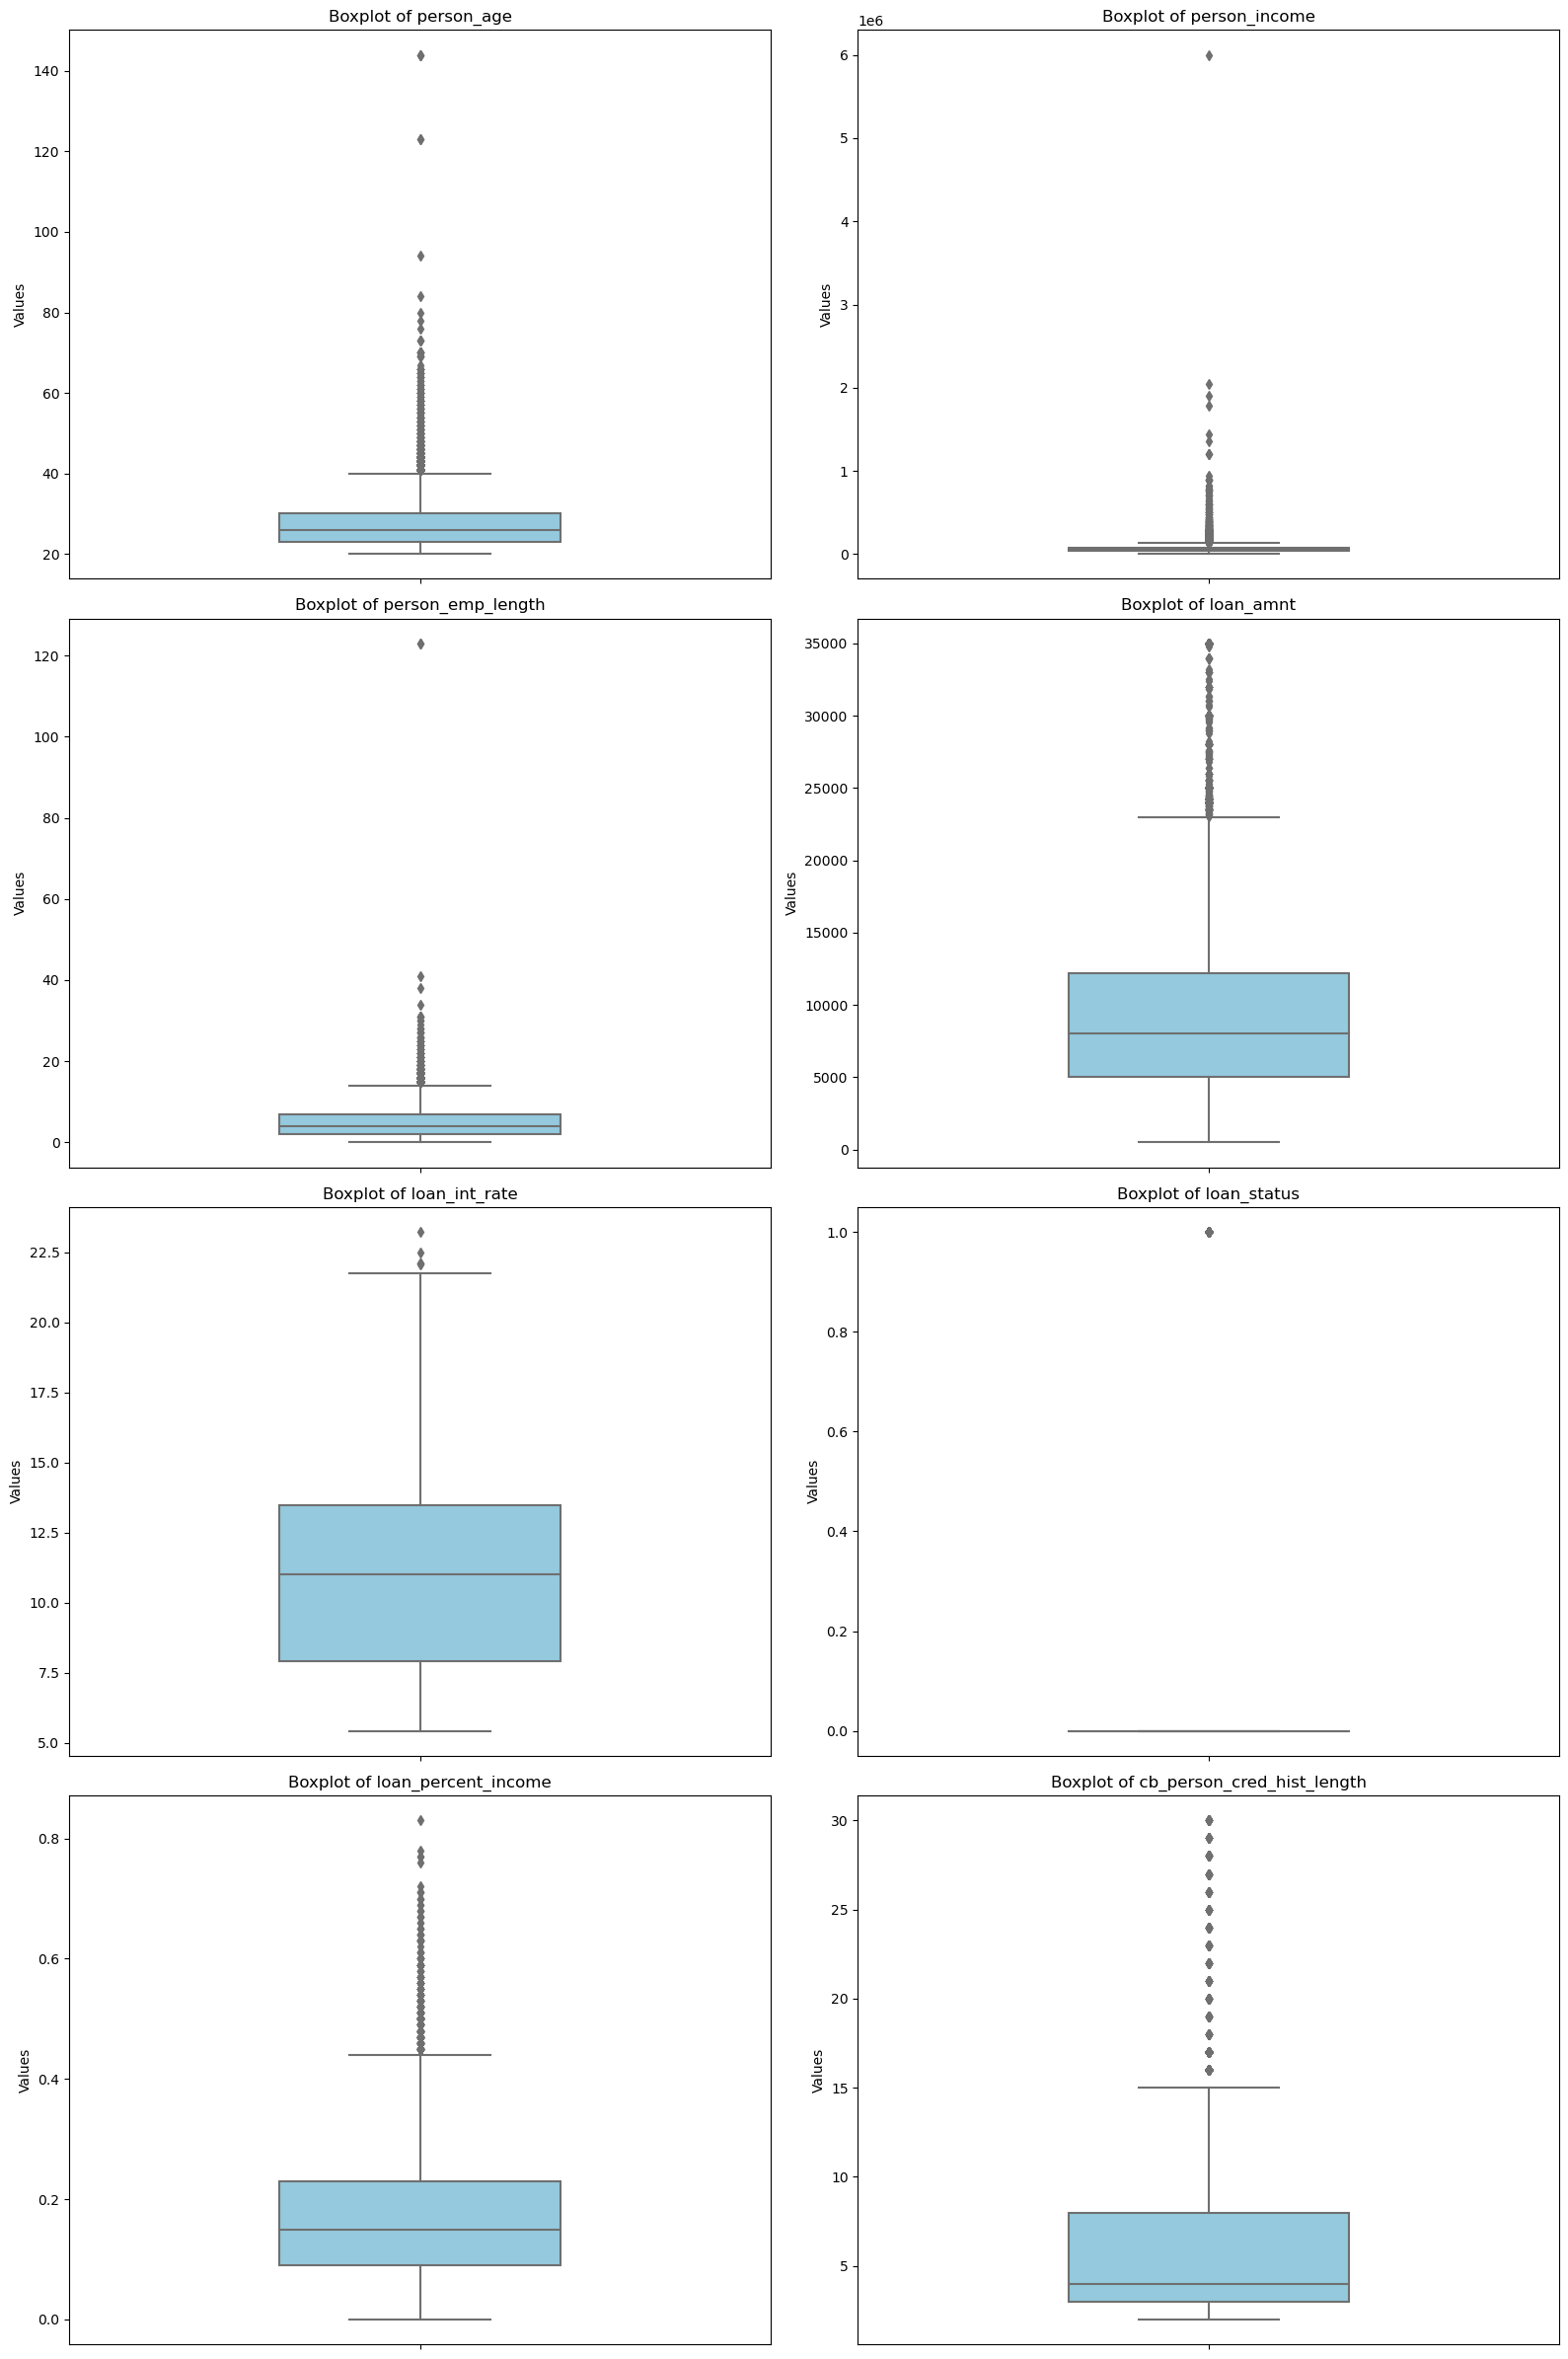

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import math
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

num_rows = math.ceil(len(numerical_columns) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows))

row = 0
for i, column in enumerate(numerical_columns):
    col = i % 2
    sns.boxplot(y=column, data=df, ax=axs[row, col],color='skyblue', width=0.4)
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')

    if (i + 1) % 2 == 0:
        row += 1

if len(numerical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')
plt.tight_layout()
plt.show()

All columns have a big number of outliers expcept the *loan_int_rate* and *loan_status* that is the target column

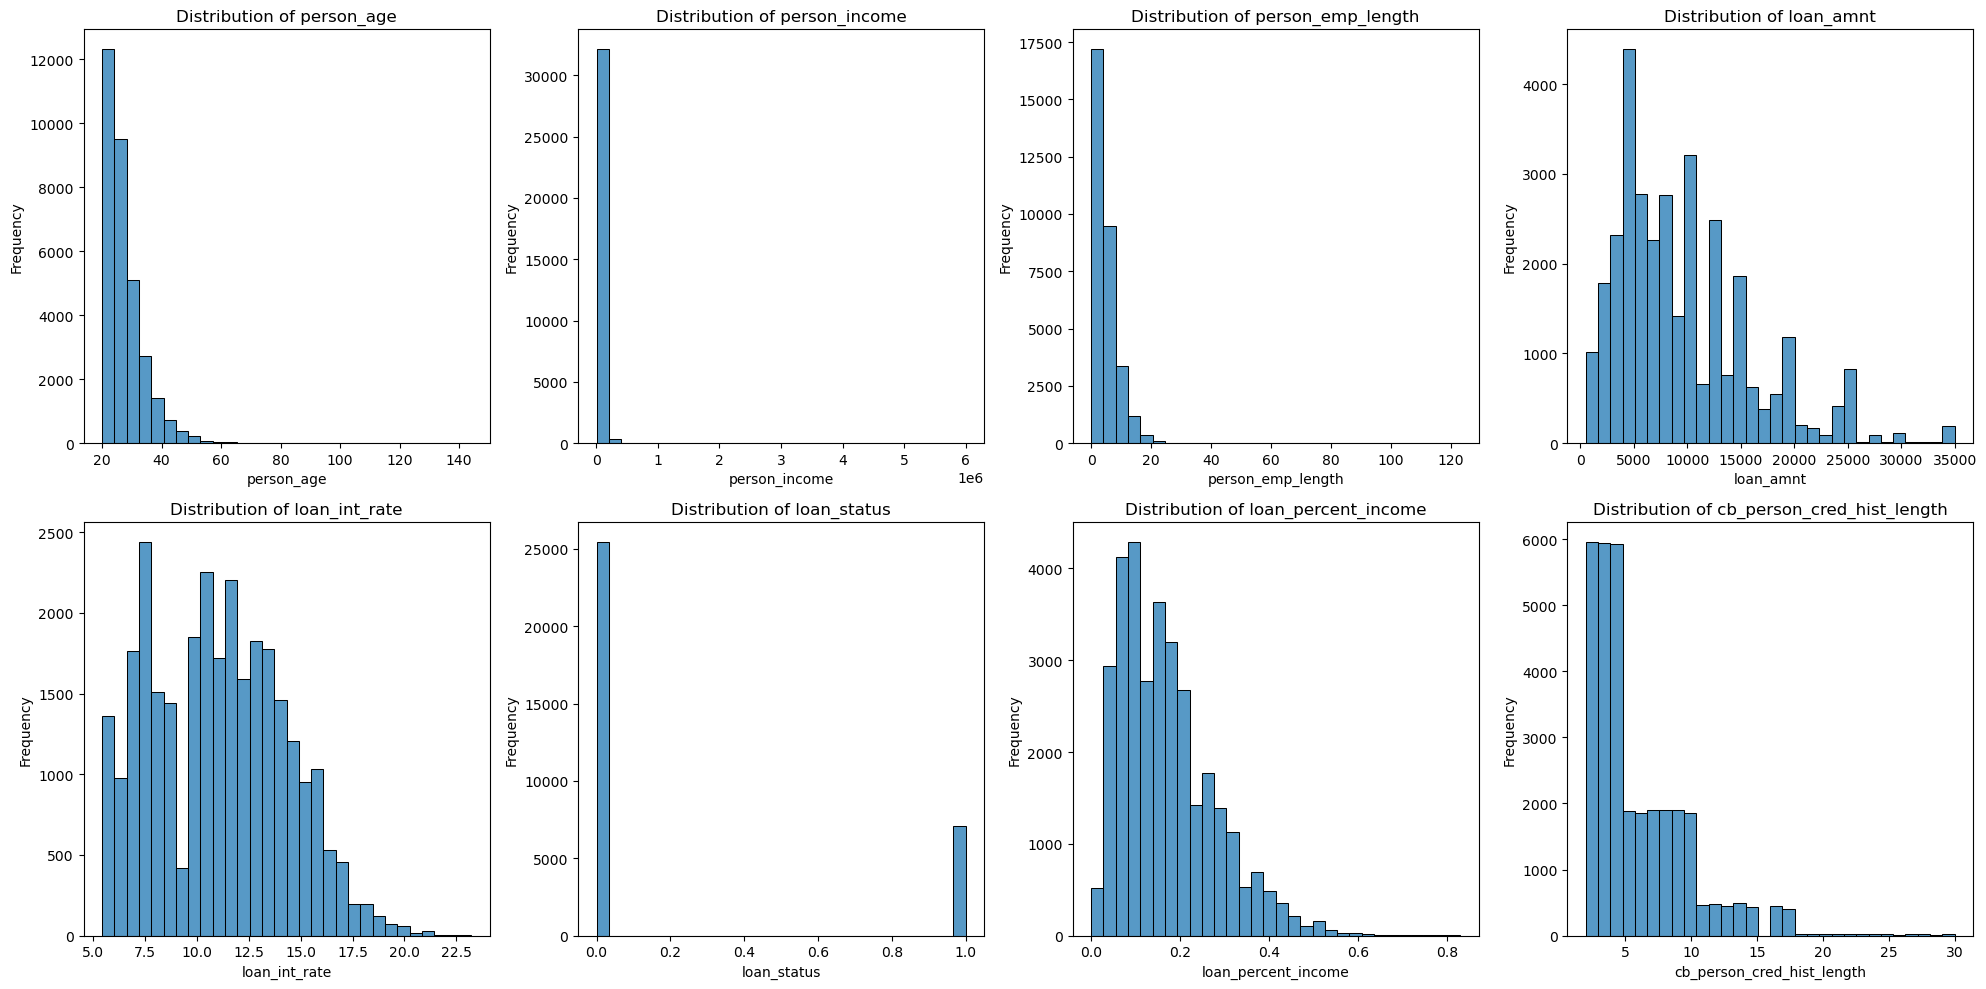

In [5]:
n_rows = 2
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  


axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], bins=30, kde=False, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Observations:
* Mostly people that have an income about 30000 are supposed to take loans
* People that are employed for a long time take less loans
* Younger people take loans more than the older ones

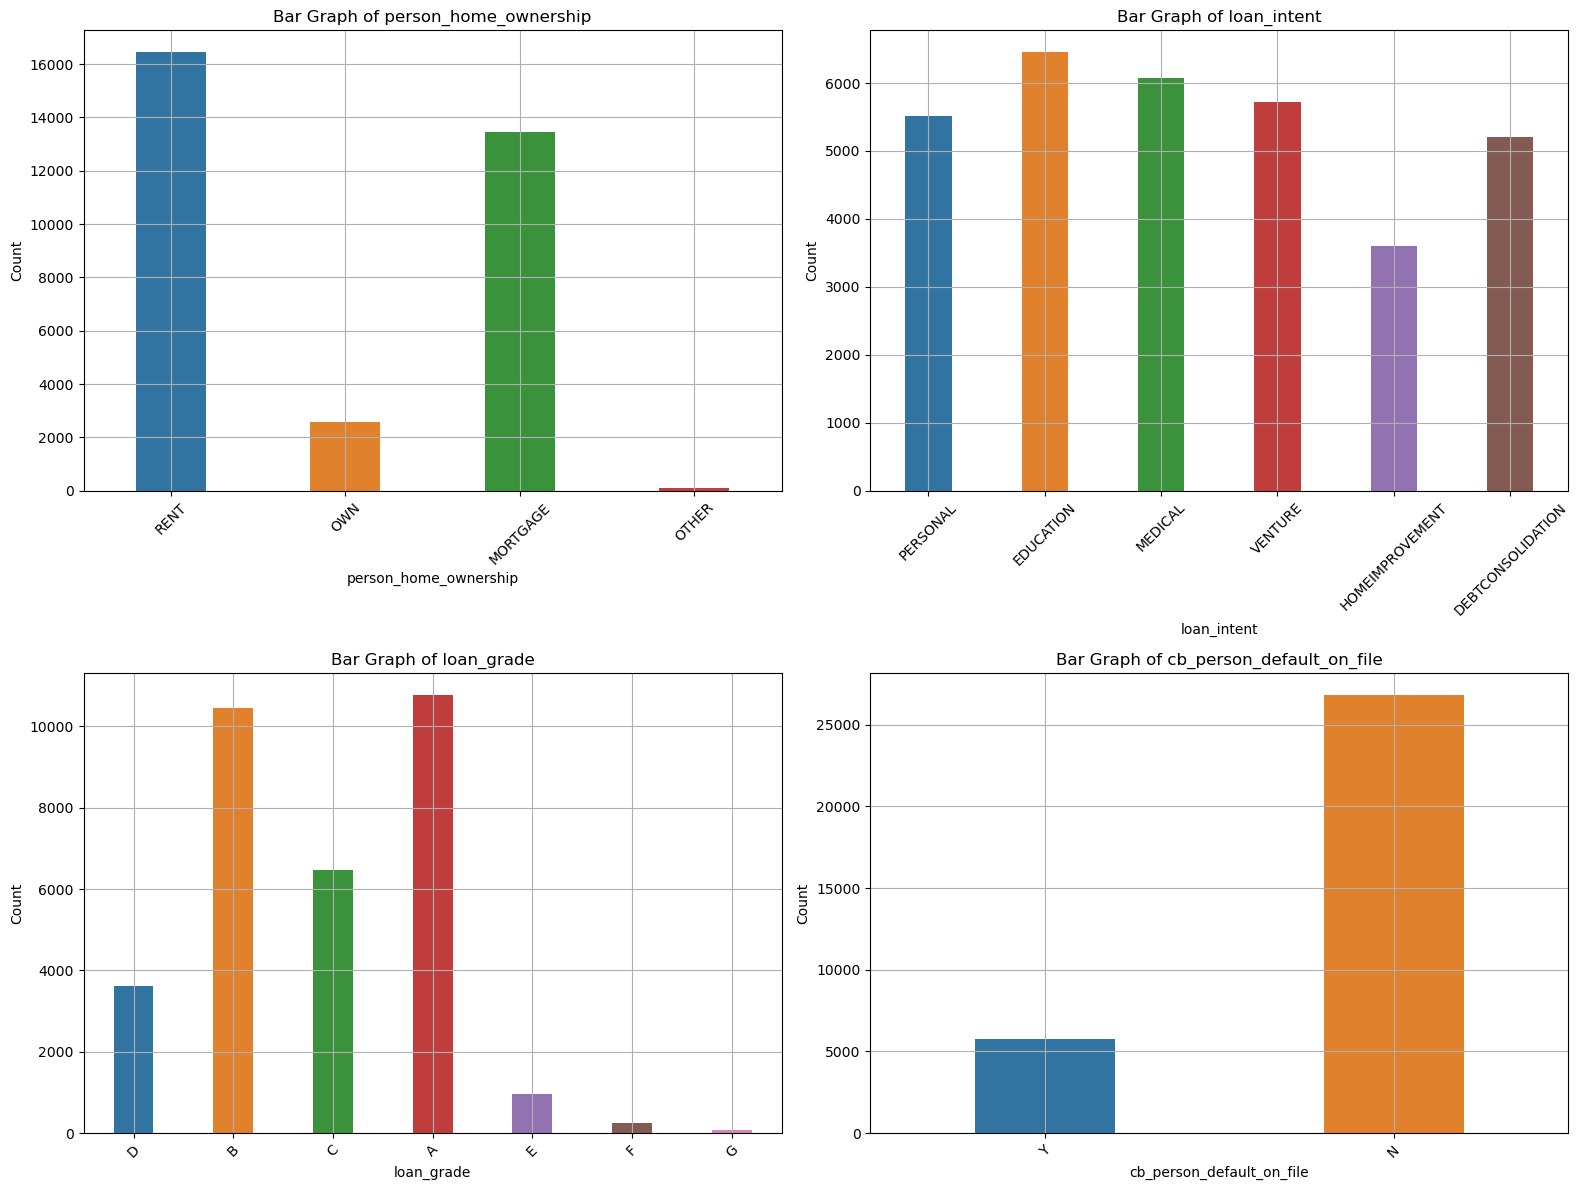

In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
num_rows = math.ceil((len(categorical_columns)) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows))

row = 0
for i, column in enumerate(categorical_columns):
    col = i % 2
    sns.countplot(x=column, data=df, ax=axs[row, col], width=0.4)
    axs[row, col].set_title(f'Bar Graph of {column}')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Count')
    axs[row, col].grid(True)
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=45)

    if (i + 1) % 2 == 0:
        row += 1

if len(categorical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')

plt.tight_layout()
plt.show()

Observations:
* People that are renting the house or are having mortgages are more inclinated to loans
* Most of the people take A or B type loans (mild types)
* Most of loans are taken for educational purposes

In [7]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = df.select_dtypes(include=['object']).columns

ohe = OneHotEncoder(sparse=False, drop='first') 

encoded_data = ohe.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(categorical_columns))

df = df.drop(categorical_columns, axis=1)

df = pd.concat([df, encoded_df], axis=1)

df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,21,9600,5.0,1000,11.14,0,0.10,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,25,9600,1.0,5500,12.87,1,0.57,3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,23,65500,4.0,35000,15.23,1,0.53,2,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,24,54400,8.0,35000,14.27,1,0.55,4,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


Used OneHotEncoder to label categorical columns.

<Axes: >

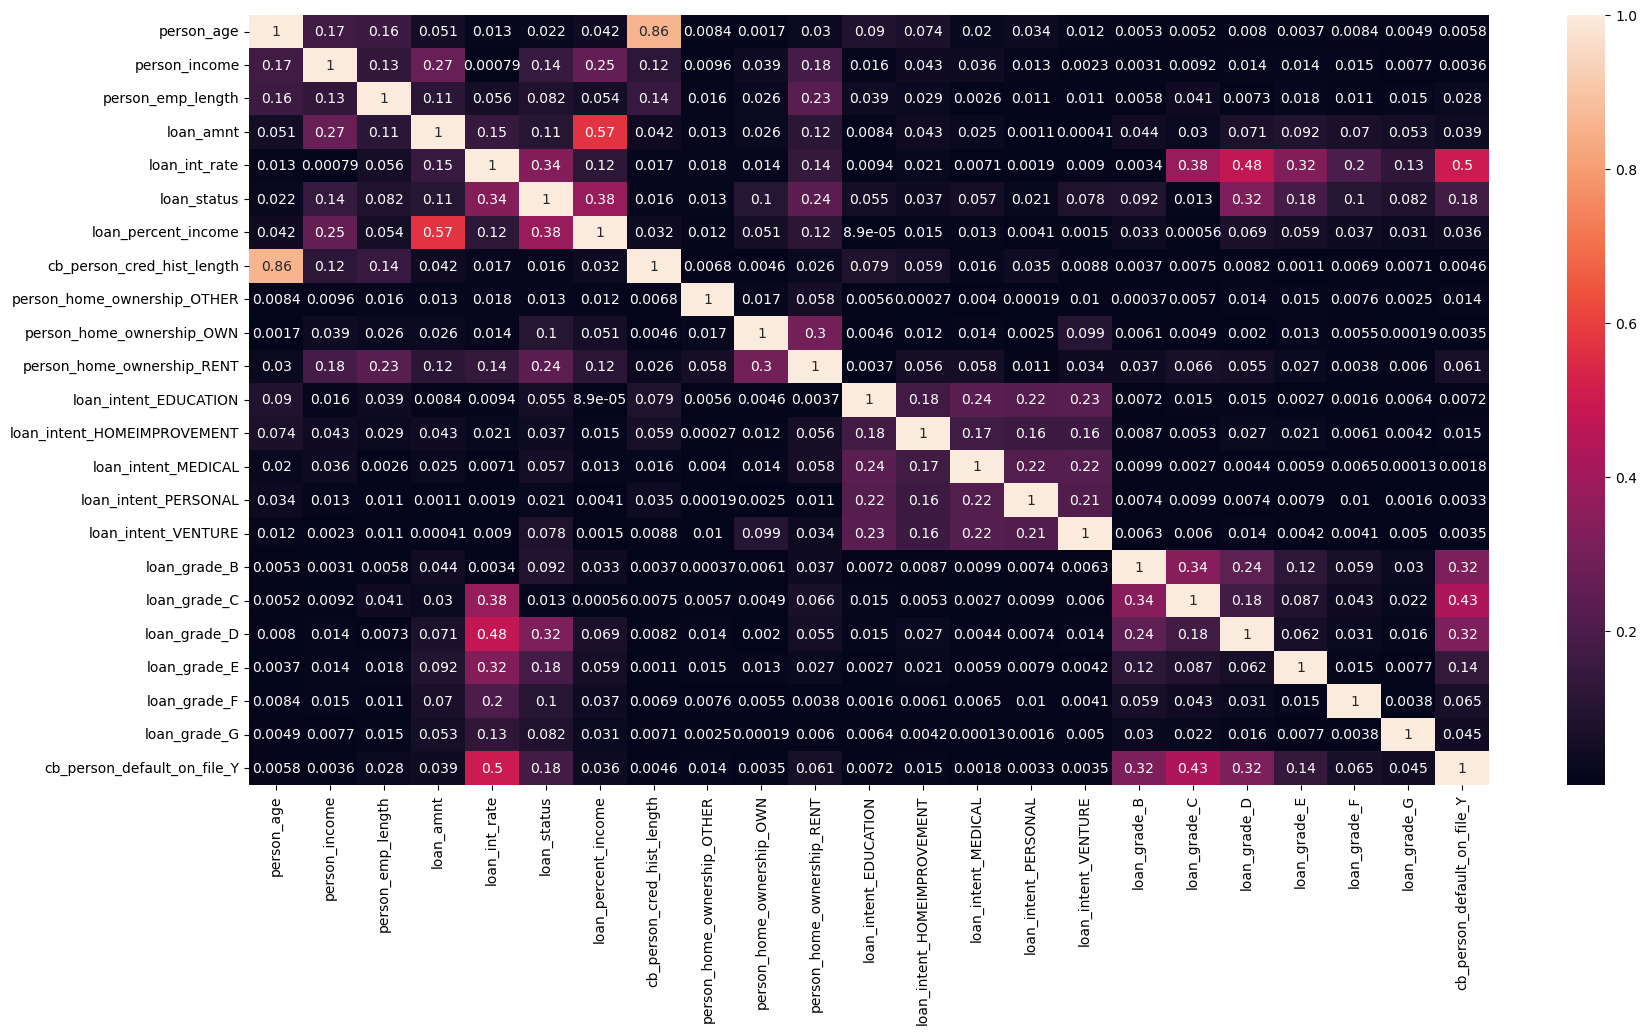

In [8]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr().abs()
sns.heatmap(correlation_matrix, annot=True)

In [9]:
sorted_correlations = correlation_matrix['loan_status'].sort_values(ascending=False)
sorted_correlations

loan_status                    1.000000
loan_percent_income            0.379366
loan_int_rate                  0.335133
loan_grade_D                   0.318998
person_home_ownership_RENT     0.238430
loan_grade_E                   0.180122
cb_person_default_on_file_Y    0.179141
person_income                  0.144449
loan_amnt                      0.105376
person_home_ownership_OWN      0.101960
loan_grade_F                   0.101841
loan_grade_B                   0.092190
person_emp_length              0.082489
loan_grade_G                   0.082306
loan_intent_VENTURE            0.078274
loan_intent_MEDICAL            0.056595
loan_intent_EDUCATION          0.055348
loan_intent_HOMEIMPROVEMENT    0.036607
person_age                     0.021629
loan_intent_PERSONAL           0.021094
cb_person_cred_hist_length     0.015529
loan_grade_C                   0.013031
person_home_ownership_OTHER    0.012543
Name: loan_status, dtype: float64

The most correlative columns are *loan_percent_income* and *loan_int_rate* or simply Loan Interest Rate

In [10]:
df.isna().sum()

person_age                        0
person_income                     0
person_emp_length               895
loan_amnt                         0
loan_int_rate                  3116
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_OTHER       0
person_home_ownership_OWN         0
person_home_ownership_RENT        0
loan_intent_EDUCATION             0
loan_intent_HOMEIMPROVEMENT       0
loan_intent_MEDICAL               0
loan_intent_PERSONAL              0
loan_intent_VENTURE               0
loan_grade_B                      0
loan_grade_C                      0
loan_grade_D                      0
loan_grade_E                      0
loan_grade_F                      0
loan_grade_G                      0
cb_person_default_on_file_Y       0
dtype: int64

<Axes: >

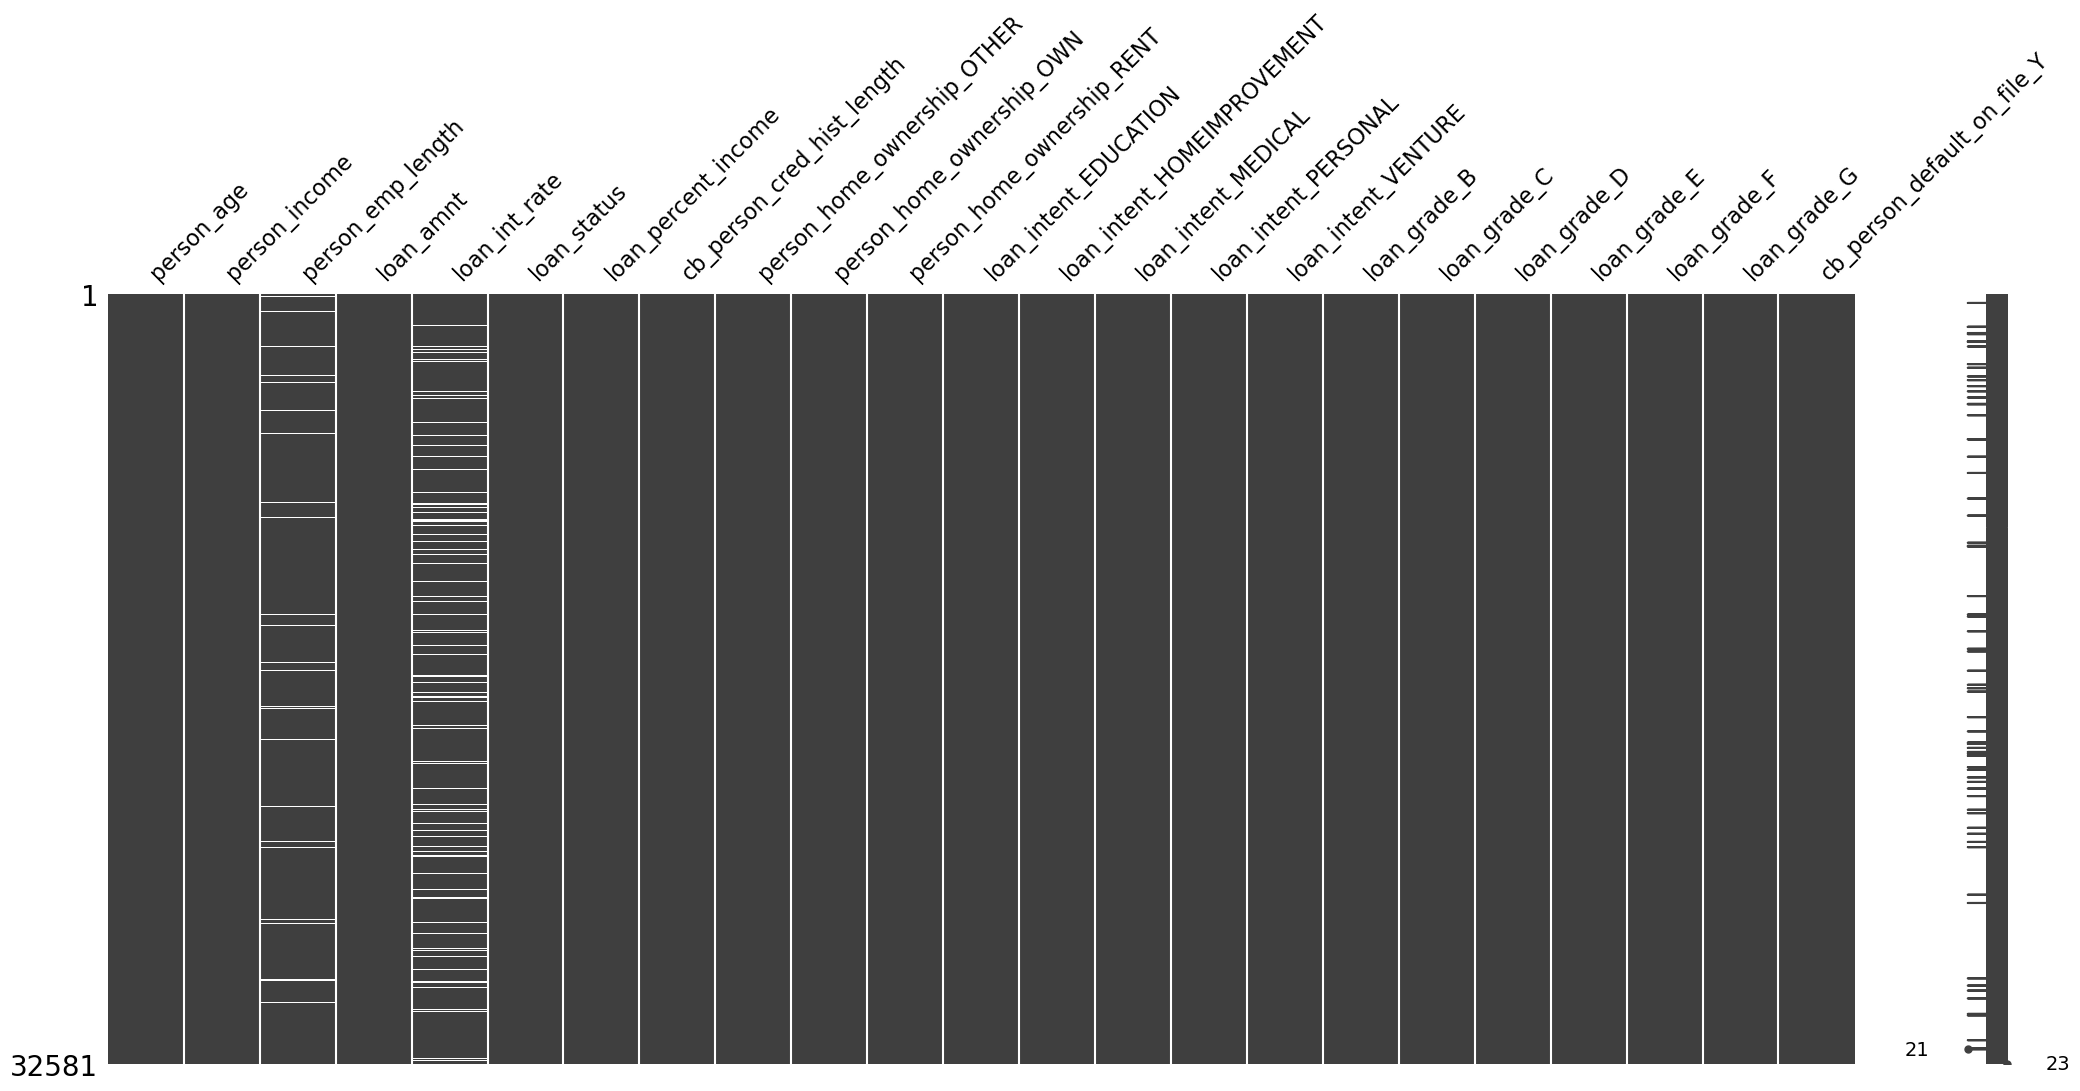

In [11]:
import missingno as msno
msno.matrix(df)

## Data Processing

<Axes: >

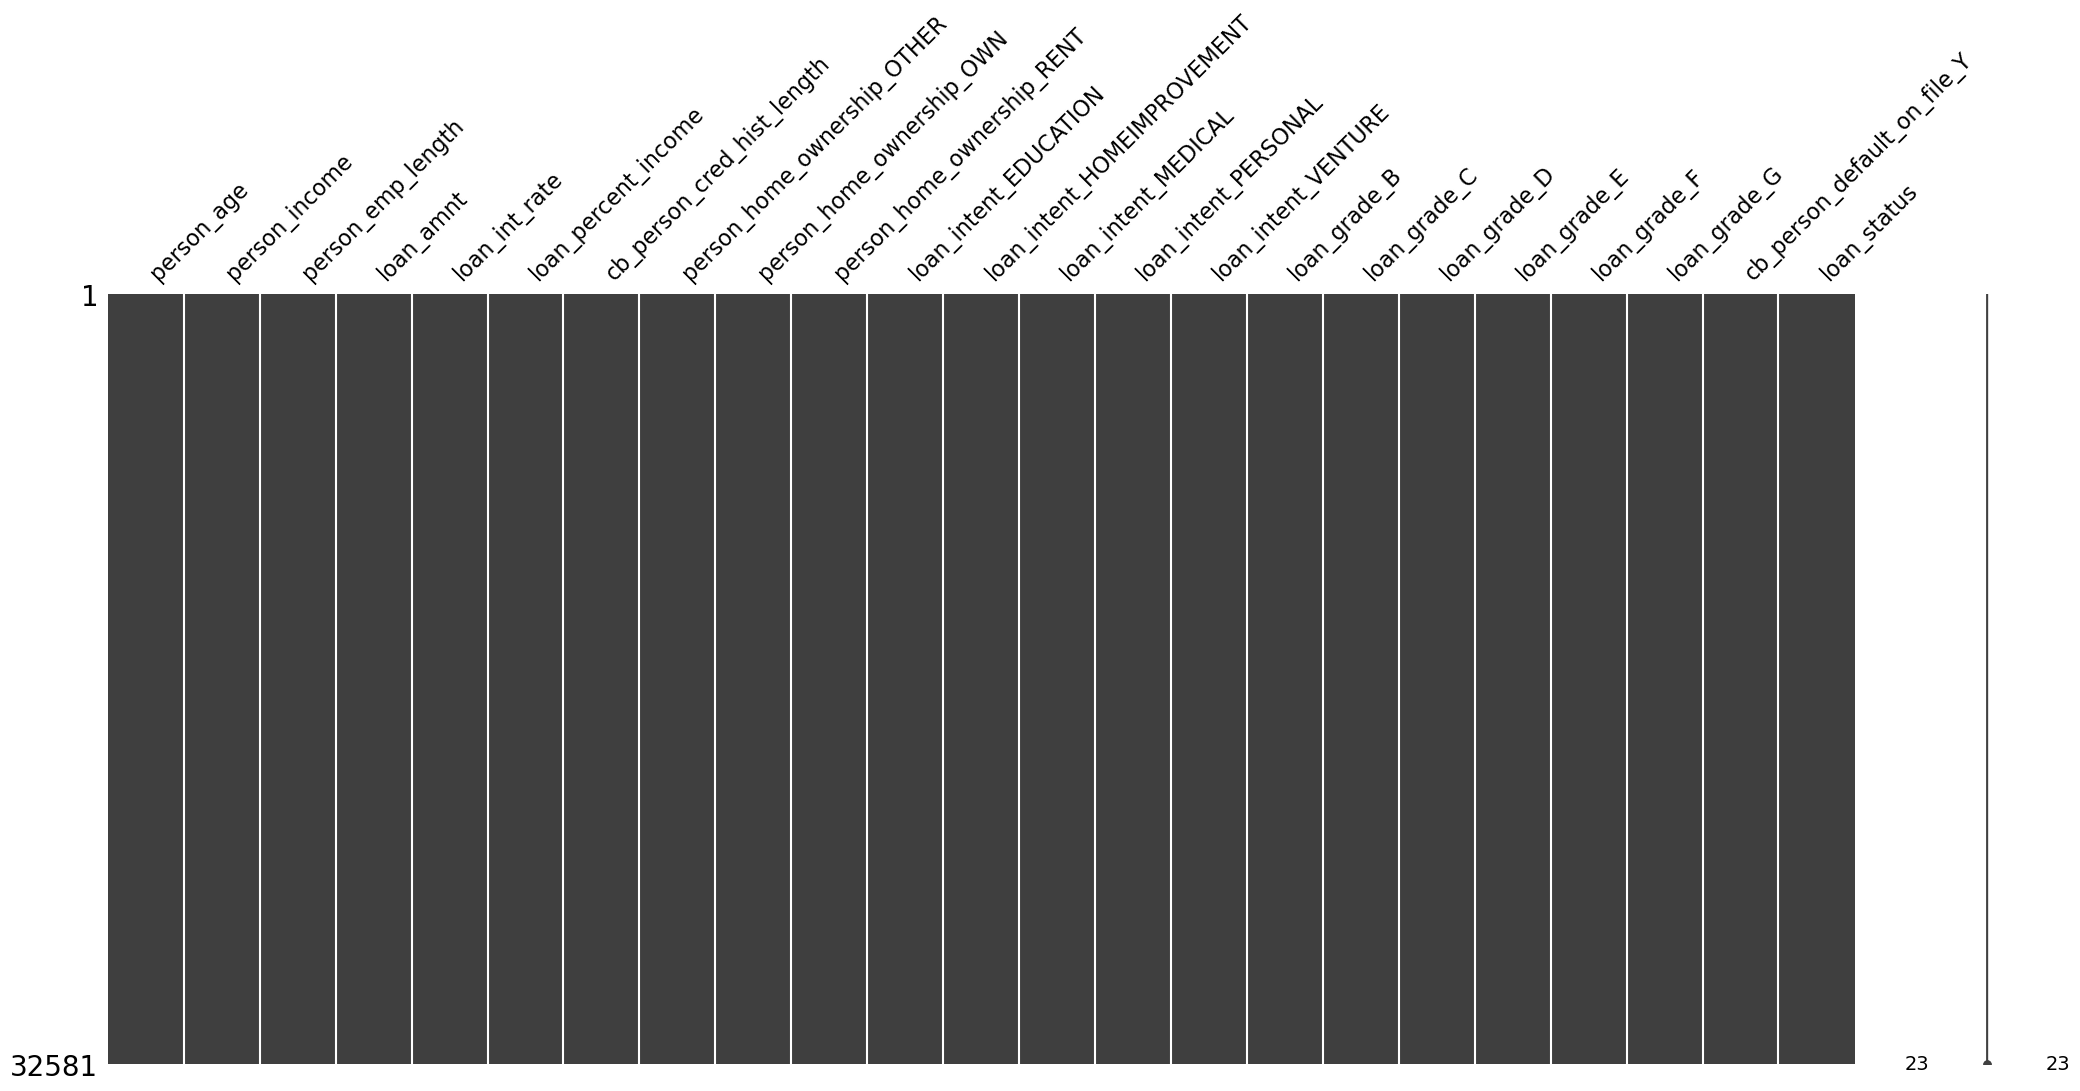

In [12]:
from reparo import MICE
imputer = MICE()
X = df.drop('loan_status', axis=1)  
y = df['loan_status']
imputed_X = X.copy()
imputer.apply(imputed_X, imputed_X.columns)
df = pd.concat([imputed_X, y], axis=1)
msno.matrix(df)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

def mean_acc_model(X,y):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=5)
    
    f1 = f1_score(y, y_pred, average='weighted')  
    print("F1 Score: %0.2f" % f1)
    conf_matrix = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
mean_acc_model(imputed_X,y)

F1 Score: 0.92
Confusion Matrix:
[[25107   366]
 [ 2051  5057]]


Checking the model accuracy after doing label encoding and msno.

In [14]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(df)

outliers = iso_forest.predict(df)

df_filtered = df[outliers != -1]

X = df_filtered.drop('loan_status', axis=1)  
y = df_filtered['loan_status']
mean_acc_model(X,y)

F1 Score: 0.94
Confusion Matrix:
[[22077   171]
 [ 1182  2209]]


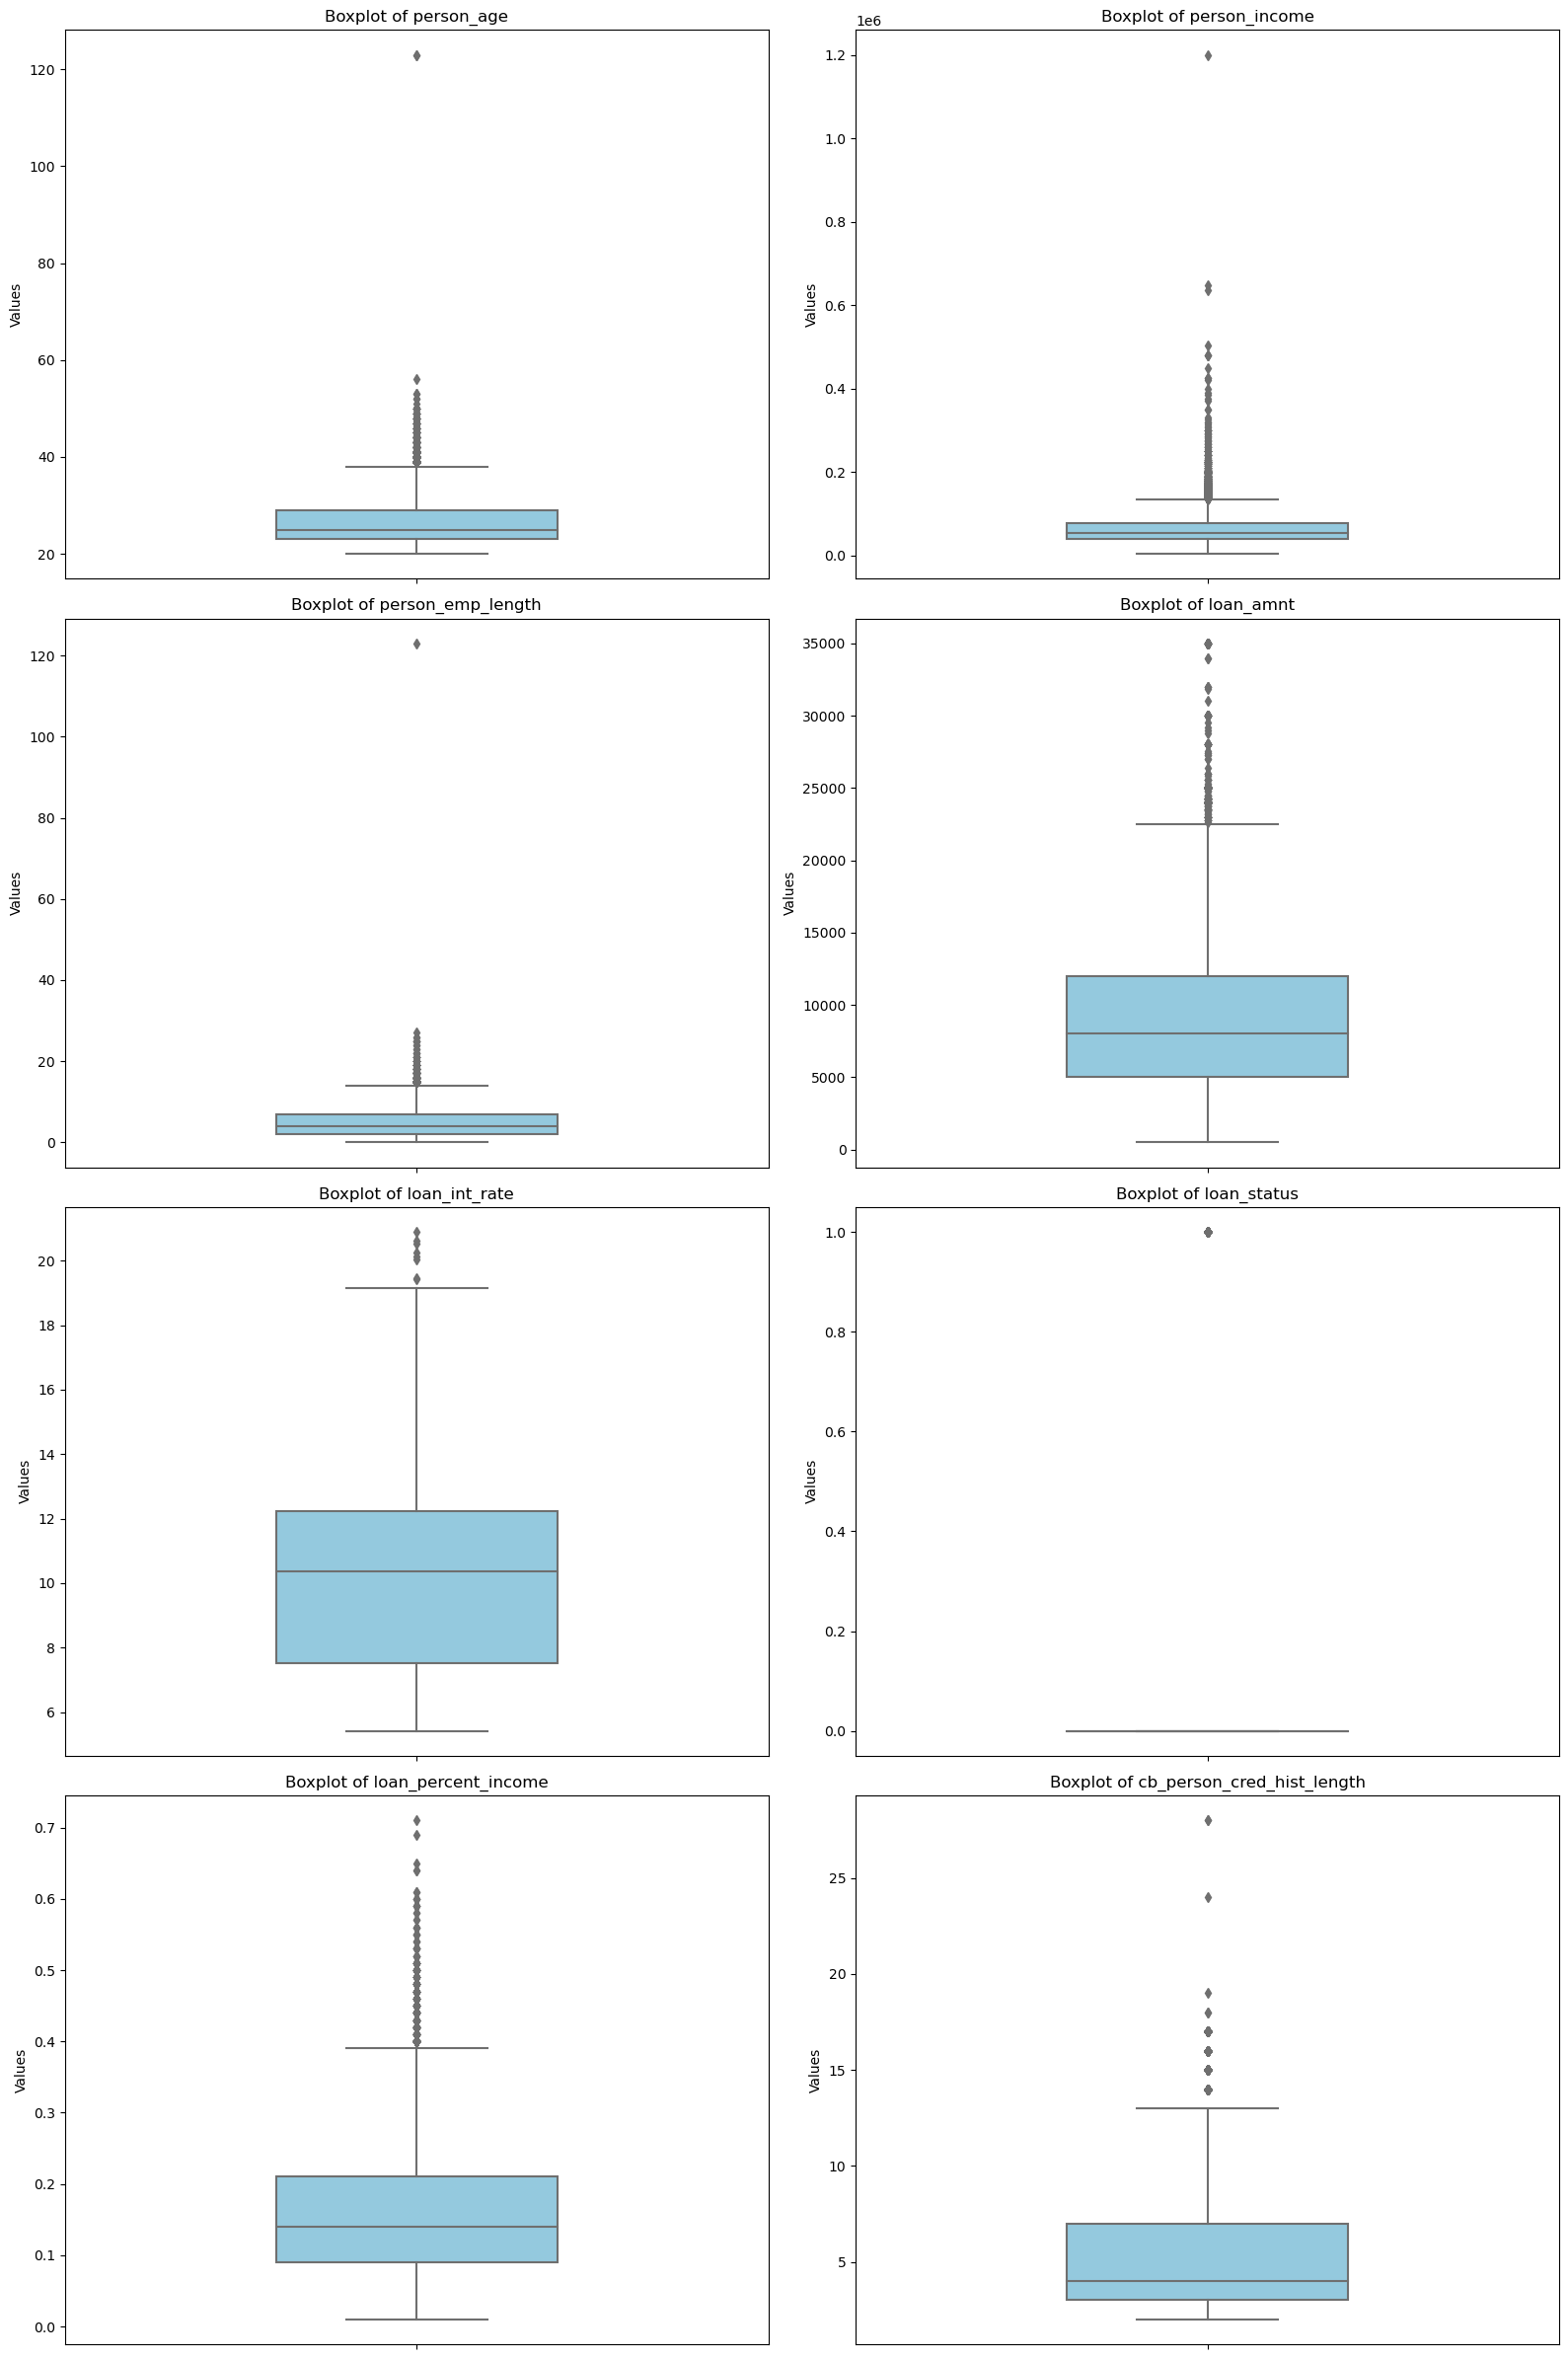

In [15]:
num_rows = math.ceil(len(numerical_columns) / 2)
fig, axs = plt.subplots(num_rows, 2, figsize=(16, 6*num_rows))

row = 0
for i, column in enumerate(numerical_columns):
    col = i % 2
    sns.boxplot(y=column, data=df_filtered, ax=axs[row, col],color='skyblue', width=0.4)
    axs[row, col].set_title(f'Boxplot of {column}')
    axs[row, col].set_ylabel('Values')

    if (i + 1) % 2 == 0:
        row += 1

if len(numerical_columns) % 2 != 0:
    axs.flatten()[-1].axis('off')
plt.tight_layout()
plt.show()

Nr. of outliers decreased as we might expect and it raised the accuracy with 2%.

In [16]:
from imperio import BoxCoxTransformer,ZCATransformer
from sklearn.model_selection import train_test_split
boxcox = BoxCoxTransformer()
num_col = numerical_columns.remove('loan_status')
normalized_df = boxcox.apply(df, target = 'loan_status',columns=numerical_columns)
normalized_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status
0,7.380832,483.798312,20.181073,372.165739,6.004998,-0.463771,1.464102,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,7.165151,193.959179,2.472136,61.245553,4.675328,-1.367544,0.828427,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,8.000000,193.959179,0.000000,146.323970,5.174956,-0.490033,1.464102,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,7.591663,509.859356,2.000000,372.165739,5.805127,-0.543978,0.828427,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,7.797959,464.476152,3.656854,372.165739,5.555131,-0.516760,2.000000,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


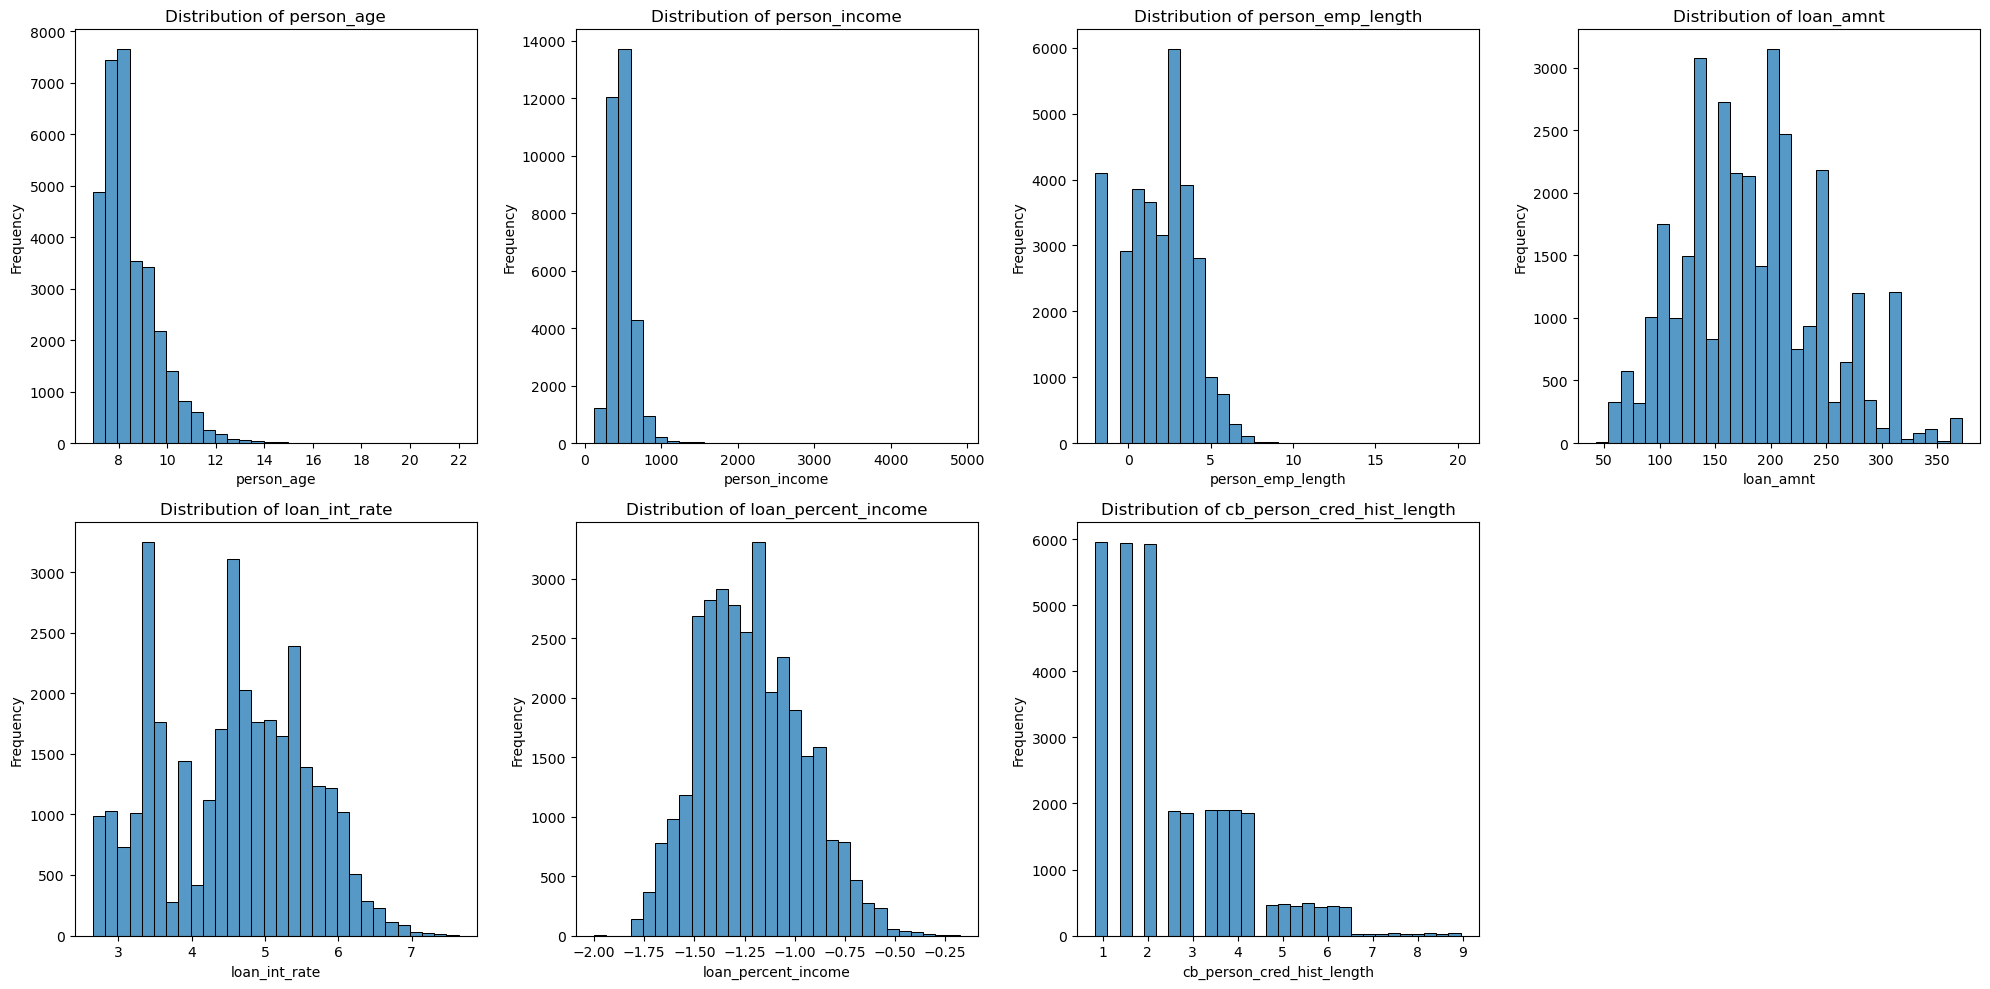

In [17]:
n_rows = 2
n_cols = 4

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10))  


axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(normalized_df[col], bins=30, kde=False, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')


for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

As seen, now the distribution of data is better than before due to the BoxCoxTransfomer.

In [18]:
zca = ZCATransformer()
new_df = zca.apply(df, target = 'loan_status')

As an additional measure, I've applied ZCA method to remove multicollinearity.

## Model training

Model: Random Forest


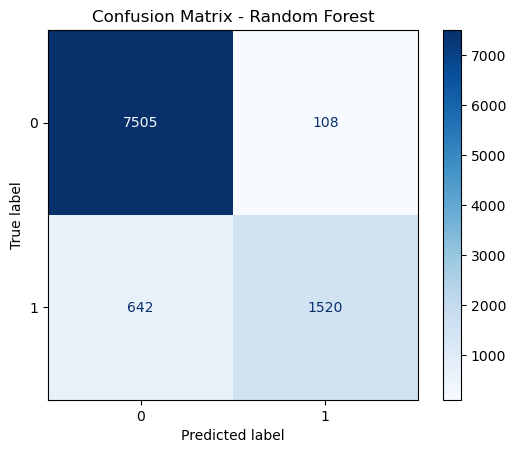

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7613
           1       0.93      0.70      0.80      2162

    accuracy                           0.92      9775
   macro avg       0.93      0.84      0.88      9775
weighted avg       0.92      0.92      0.92      9775

Model: SVC (Poly)


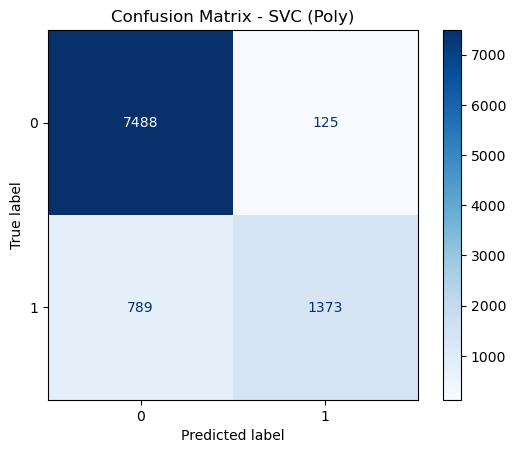

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7613
           1       0.92      0.64      0.75      2162

    accuracy                           0.91      9775
   macro avg       0.91      0.81      0.85      9775
weighted avg       0.91      0.91      0.90      9775

Model: XGBClassifier


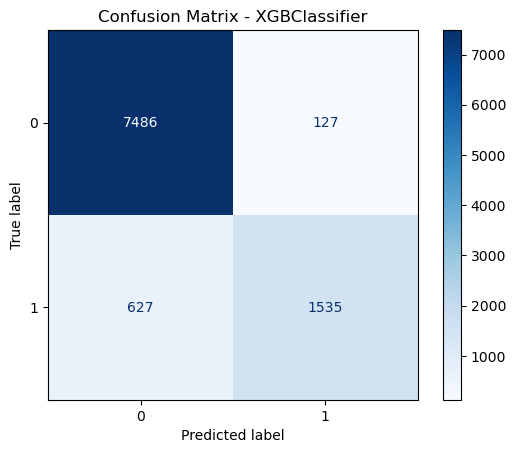

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7613
           1       0.92      0.71      0.80      2162

    accuracy                           0.92      9775
   macro avg       0.92      0.85      0.88      9775
weighted avg       0.92      0.92      0.92      9775

[LightGBM] [Info] Number of positive: 4946, number of negative: 17860
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003560 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 22806, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.216873 -> initscore=-1.283984
[LightGBM] [Info] Start training from score -1.283984
Model: LGBMClassifier


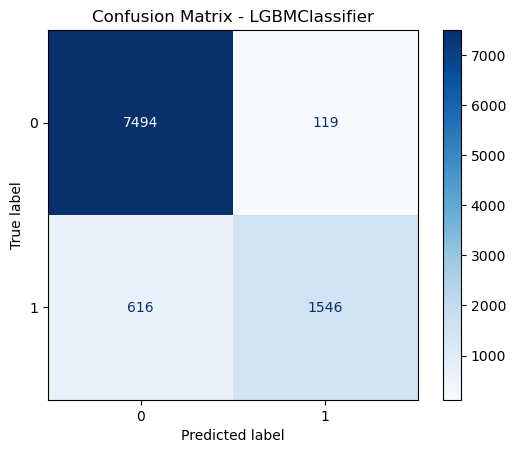

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7613
           1       0.93      0.72      0.81      2162

    accuracy                           0.92      9775
   macro avg       0.93      0.85      0.88      9775
weighted avg       0.93      0.92      0.92      9775



,Model Name,F1 Score
0,LGBMClassifier,0.921114
1,Random Forest,0.919168
2,XGBClassifier,0.919048
3,SVC (Poly),0.899968


In [26]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from lightgbm import LGBMClassifier
df = new_df
X = df.drop('loan_status', axis=1)  
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVC (Poly)': SVC(kernel='poly', degree=3, random_state=42),
    'XGBClassifier': XGBClassifier(random_state=42),
    'LGBMClassifier': LGBMClassifier(random_state=42)
}

model_f1_scores = pd.DataFrame(columns=['Model Name', 'F1 Score'])

for model_name, model in models.items():
   
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
  
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    print(classification_report(y_test, y_pred))
    model_f1_scores.loc[len(model_f1_scores)] = [model_name, f1]

model_f1_scores = model_f1_scores.sort_values(by='F1 Score', ascending=False).reset_index(drop=True)
model_f1_scores

Conclusions: 
* Data normalization and ZCA can lower the accuracy but in the same time increase the nr. of true labels
* Best model is LGBM Classifier
* Decreasing nr. of outliers might and is almost crucial for the model training
* Hope that all the people would pay their loans :3